In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
df=pd.read_csv('us_vaccine_tweets_sent.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,sentiment_score
0,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282.0,96.0,788.0,False,2020-08-18 11:57:00,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,False,-0.968751
1,Magzter,"New York, USA",Magzter is the world’s largest digital reading...,23-12-2010 13:55,5522.0,1552.0,448.0,False,2020-08-18 04:20:00,#Russia produces first batch of #Covid vax; se...,"['Russia', 'Covid']",TweetDeck,False,0.250000
2,@TheCupIsNice,"Las Vegas, NV","All of the Wrestling Companys,🏀,⚾,🏈,👊MMA and ⚽...",22-06-2019 06:22,55.0,1366.0,7591.0,False,2020-08-18 03:51:00,@realDonaldTrump your gonna go down as the wor...,NaN,Twitter for Android,False,-0.624900
3,Jamie Ooooo,United States,We live in a culture where everything tastes g...,28-05-2015 04:20,384.0,1020.0,6401.0,False,2020-08-18 03:14:00,Just so we’re clear on how I feel about a #cov...,['covidvaccine'],Twitter for iPhone,False,0.436400
4,City Visions Radio,San Francisco,local live call-in radio with Bay Area creator...,03-05-2009 22:35,313.0,625.0,344.0,False,2020-08-18 01:04:00,Now at https://t.co/86d419hWQF Peter Chin-Hong...,['COVID19'],Twitter for iPhone,False,0.822262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92428,Jennifer Coleman,"Virginia, USA",Army veteran. Golf fan. History buff. Scorpio.,2013-11-27 15:43:31,1514.0,293.0,108461.0,False,2022-09-06 11:33:59,Going back to the pharmacy next month to get m...,['CovidVaccine'],Twitter Web App,False,-0.381800
92429,H24 NET,United States,View the latest news and breaking news today f...,2022-04-05 21:39:30,60.0,10.0,995.0,False,2022-09-06 11:31:06,Chinese trivalent COVID-19 vaccine approved fo...,['CovidVaccine'],Twitter Web App,False,0.421500
92430,The Silicon Review,"Trenton, New Jersey",The Silicon Review is an ISO 9001:2015 Certifi...,2014-05-07 23:46:14,16095.0,209.0,203.0,False,2022-09-06 08:30:00,China approved @cansinobio_inc inhaled Covid v...,"['thesiliconreview', 'cansinoinhale', 'inhalev...",TweetDeck,False,0.421500
92431,"David Gorski, MD, PhD","Detroit, Michigan, USA",Surgeon/scientist exposing quackery and promot...,2009-10-26 03:19:00,72345.0,1997.0,85547.0,True,2022-09-06 07:24:11,Antivaxxers love to claim that vaccine mandate...,"['CovidVaccine', 'NurembergCode', 'Nuremberg2']",WordPress.com,False,-0.051600


In [3]:
import pandas as pd

df['date'] = pd.to_datetime(df['date']) 
df.set_index('date', inplace=True)  # Set 'date' column as the index

# Group by day and perform the calculations
daily_summary = df.resample('D')['sentiment_score'].agg(['sum', 'mean', 'count'])

# Reset the index and rename the columns
daily_summary.reset_index(inplace=True)
daily_summary.columns = ['date', 'sum_sentiment_score', 'avg_sentiment_score', 'tweet_count']


In [4]:
daily_summary

,date,sum_sentiment_score,avg_sentiment_score,tweet_count
0,2020-01-09,-4.885399,-0.187900,26
1,2020-01-10,0.000000,NaN,0
2,2020-01-11,0.000000,NaN,0
3,2020-01-12,0.000000,NaN,0
4,2020-01-13,0.000000,NaN,0
...,...,...,...,...
975,2022-09-10,-6.546471,-0.198378,33
976,2022-09-11,-8.115179,-0.279834,29
977,2022-09-12,5.571819,0.214301,26
978,2022-09-13,-4.304051,-0.113264,38


In [5]:
rows_with_zero_tweet_count = daily_summary[daily_summary['tweet_count'] == 0]
rows_with_zero_tweet_count

,date,sum_sentiment_score,avg_sentiment_score,tweet_count
1,2020-01-10,0.0,NaN,0
2,2020-01-11,0.0,NaN,0
3,2020-01-12,0.0,NaN,0
4,2020-01-13,0.0,NaN,0
5,2020-01-14,0.0,NaN,0
...,...,...,...,...
966,2022-09-01,0.0,NaN,0
967,2022-09-02,0.0,NaN,0
968,2022-09-03,0.0,NaN,0
969,2022-09-04,0.0,NaN,0


In [6]:
rows_without_zero_tweet_count = daily_summary[daily_summary['tweet_count'] != 0]
rows_without_zero_tweet_count

,date,sum_sentiment_score,avg_sentiment_score,tweet_count
0,2020-01-09,-4.885399,-0.187900,26
31,2020-02-09,-3.423437,-0.085586,40
60,2020-03-09,-9.808869,-0.132552,74
91,2020-04-09,-5.198317,-0.148523,35
121,2020-05-09,2.607551,0.096576,27
...,...,...,...,...
975,2022-09-10,-6.546471,-0.198378,33
976,2022-09-11,-8.115179,-0.279834,29
977,2022-09-12,5.571819,0.214301,26
978,2022-09-13,-4.304051,-0.113264,38


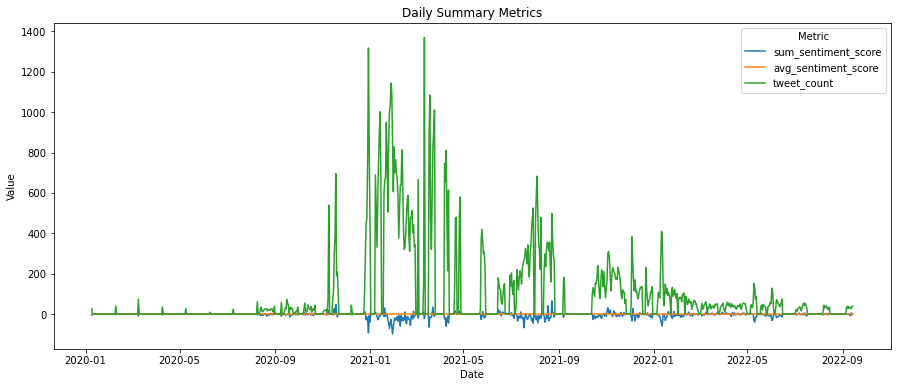

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index
daily_summary.reset_index(inplace=True)

# Reshape the data into long format
long_format_df = daily_summary.melt(id_vars='date', value_vars=['sum_sentiment_score', 'avg_sentiment_score', 'tweet_count'], var_name='metric', value_name='value')

# Plot the data using seaborn's lineplot
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
sns.lineplot(data=long_format_df, x='date', y='value', hue='metric')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Daily Summary Metrics')
plt.legend(title='Metric')

# Display the plot
plt.show()


In [8]:
# Set the 'date' column as the index and ensure it's a datetime object
daily_summary['date'] = pd.to_datetime(daily_summary['date'])
daily_summary.set_index('date', inplace=True)


In [9]:
# Interpolate missing values
daily_summary_interpolated = daily_summary.interpolate(method='time')

In [10]:
# Interpolate only specific columns
daily_summary[['sum_sentiment_score', 'avg_sentiment_score']] = daily_summary[['sum_sentiment_score', 'avg_sentiment_score']].interpolate(method='time')


In [11]:
rows_without_zero_tweet_count = daily_summary[daily_summary['tweet_count'] != 0]
rows_without_zero_tweet_count

,index,sum_sentiment_score,avg_sentiment_score,tweet_count
date,,,,
2020-01-09,0,-4.885399,-0.187900,26
2020-02-09,31,-3.423437,-0.085586,40
2020-03-09,60,-9.808869,-0.132552,74
2020-04-09,91,-5.198317,-0.148523,35
2020-05-09,121,2.607551,0.096576,27
...,...,...,...,...
2022-09-10,975,-6.546471,-0.198378,33
2022-09-11,976,-8.115179,-0.279834,29
2022-09-12,977,5.571819,0.214301,26


In [12]:
#rows_without_zero_tweet_count.to_csv('vaccine_tweet_sent_nozero.csv')  

In [13]:
rows_with_zero_tweet_count = daily_summary[daily_summary['tweet_count'] == 0]
rows_with_zero_tweet_count

,index,sum_sentiment_score,avg_sentiment_score,tweet_count
date,,,,
2020-01-10,1,0.0,-0.184600,0
2020-01-11,2,0.0,-0.181299,0
2020-01-12,3,0.0,-0.177999,0
2020-01-13,4,0.0,-0.174698,0
2020-01-14,5,0.0,-0.171398,0
...,...,...,...,...
2022-09-01,966,0.0,-0.062226,0
2022-09-02,967,0.0,-0.067815,0
2022-09-03,968,0.0,-0.073403,0


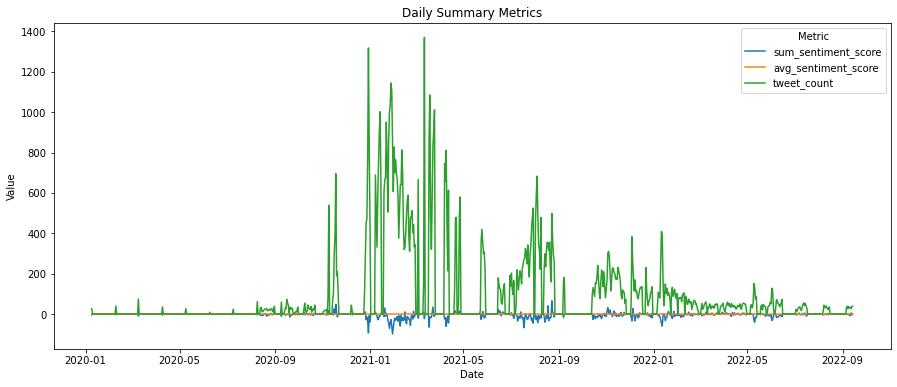

In [14]:
# Reset the index
daily_summary.reset_index(inplace=True)

# Reshape the data into long format
long_format_df = daily_summary.melt(id_vars='date', value_vars=['sum_sentiment_score', 'avg_sentiment_score', 'tweet_count'], var_name='metric', value_name='value')

# Plot the data using seaborn's lineplot
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
sns.lineplot(data=long_format_df, x='date', y='value', hue='metric')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Daily Summary Metrics')
plt.legend(title='Metric')

# Display the plot
plt.show()


In [15]:
daily_summary

,date,index,sum_sentiment_score,avg_sentiment_score,tweet_count
0,2020-01-09,0,-4.885399,-0.187900,26
1,2020-01-10,1,0.000000,-0.184600,0
2,2020-01-11,2,0.000000,-0.181299,0
3,2020-01-12,3,0.000000,-0.177999,0
4,2020-01-13,4,0.000000,-0.174698,0
...,...,...,...,...,...
975,2022-09-10,975,-6.546471,-0.198378,33
976,2022-09-11,976,-8.115179,-0.279834,29
977,2022-09-12,977,5.571819,0.214301,26
978,2022-09-13,978,-4.304051,-0.113264,38


In [16]:
#daily_summary.to_csv('us_vaccine_tweets_sent_by_day.csv')  

In [17]:
confirmed_rate=pd.read_csv('confirmed_rate.csv')
deaths_rate=pd.read_csv('deaths_rate.csv')
confirmed_rate

,Province_State,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22,3/28/22
0,Alabama,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.263336,0.263336,0.263413,0.263453,0.263491,0.263572,0.263606,0.263606,0.263606,0.264019
1,Alaska,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.330484,0.330484,0.330975,0.330975,0.331759,0.331759,0.331759,0.331759,0.331759,0.332506
2,Arizona,0.000000e+00,0.000000e+00,0.000000e+00,1.373868e-07,1.373868e-07,1.373868e-07,1.373868e-07,1.373868e-07,1.373868e-07,...,0.273739,0.273739,0.273739,0.273739,0.273739,0.274367,0.274367,0.274367,0.274367,0.274367
3,Arkansas,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.275041,0.275137,0.275396,0.275597,0.275680,0.275765,0.275828,0.275868,0.275880,0.275887
4,California,0.000000e+00,0.000000e+00,0.000000e+00,5.061725e-08,5.061725e-08,5.061725e-08,5.061725e-08,5.061725e-08,7.592587e-08,...,0.229431,0.229548,0.229686,0.229759,0.229847,0.229933,0.229980,0.230004,0.230004,0.230190
5,Colorado,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.231101,0.231101,0.231310,0.231956,0.232188,0.232400,0.232799,0.232799,0.232799,0.233090
6,Connecticut,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.205276,0.205276,0.205445,0.205574,0.205686,0.205809,0.205929,0.205929,0.205929,0.206213
7,Delaware,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.265562,0.265640,0.265679,0.265708,0.265776,0.265981,0.266168,0.266168,0.266362,0.266394
8,District of Columbia,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.190752,0.190752,0.190752,0.190752,0.190752,0.190752,0.190752,0.190752,0.190752,0.190752
9,Florida,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.273225,0.273225,0.273225,0.273225,0.273225,0.273225,0.274005,0.274005,0.274005,0.274005


In [18]:
numerical_cols = confirmed_rate.iloc[:, 1:]
confirmed_rate.loc['Total'] = numerical_cols.sum()
confirmed_rate

,Province_State,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22,3/28/22
0,Alabama,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.263336,0.263336,0.263413,0.263453,0.263491,0.263572,0.263606,0.263606,0.263606,0.264019
1,Alaska,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.330484,0.330484,0.330975,0.330975,0.331759,0.331759,0.331759,0.331759,0.331759,0.332506
2,Arizona,0.000000e+00,0.000000e+00,0.000000e+00,1.373868e-07,1.373868e-07,1.373868e-07,1.373868e-07,1.373868e-07,1.373868e-07,...,0.273739,0.273739,0.273739,0.273739,0.273739,0.274367,0.274367,0.274367,0.274367,0.274367
3,Arkansas,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.275041,0.275137,0.275396,0.275597,0.275680,0.275765,0.275828,0.275868,0.275880,0.275887
4,California,0.000000e+00,0.000000e+00,0.000000e+00,5.061725e-08,5.061725e-08,5.061725e-08,5.061725e-08,5.061725e-08,7.592587e-08,...,0.229431,0.229548,0.229686,0.229759,0.229847,0.229933,0.229980,0.230004,0.230004,0.230190
5,Colorado,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.231101,0.231101,0.231310,0.231956,0.232188,0.232400,0.232799,0.232799,0.232799,0.233090
6,Connecticut,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.205276,0.205276,0.205445,0.205574,0.205686,0.205809,0.205929,0.205929,0.205929,0.206213
7,Delaware,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.265562,0.265640,0.265679,0.265708,0.265776,0.265981,0.266168,0.266168,0.266362,0.266394
8,District of Columbia,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.190752,0.190752,0.190752,0.190752,0.190752,0.190752,0.190752,0.190752,0.190752,0.190752
9,Florida,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.273225,0.273225,0.273225,0.273225,0.273225,0.273225,0.274005,0.274005,0.274005,0.274005


In [19]:
us_confirm = pd.DataFrame(confirmed_rate.loc['Total']).reset_index()
us_confirm

,index,Total
0,Province_State,NaN
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
792,3/24/22,12.531073
793,3/25/22,12.536204
794,3/26/22,12.536913
795,3/27/22,12.537611


In [20]:
us_confirm.drop(0, axis=0, inplace=True) # drop first row
us_confirm.rename(columns={'index':'date'}, inplace=True) # rename column
us_confirm

,date,Total
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
5,1/27/20,0.0
...,...,...
792,3/24/22,12.531073
793,3/25/22,12.536204
794,3/26/22,12.536913
795,3/27/22,12.537611


In [21]:
# Convert the date column in df1 to datetime and then format it to YYYY-MM-DD
us_confirm['date'] = pd.to_datetime(us_confirm['date']).dt.strftime('%Y-%m-%d')
daily_summary['date'] = pd.to_datetime(daily_summary['date'])
daily_summary.drop('index', axis=1, inplace=True) 
daily_summary

,date,sum_sentiment_score,avg_sentiment_score,tweet_count
0,2020-01-09,-4.885399,-0.187900,26
1,2020-01-10,0.000000,-0.184600,0
2,2020-01-11,0.000000,-0.181299,0
3,2020-01-12,0.000000,-0.177999,0
4,2020-01-13,0.000000,-0.174698,0
...,...,...,...,...
975,2022-09-10,-6.546471,-0.198378,33
976,2022-09-11,-8.115179,-0.279834,29
977,2022-09-12,5.571819,0.214301,26
978,2022-09-13,-4.304051,-0.113264,38


In [22]:
us_confirm

,date,Total
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0
...,...,...
792,2022-03-24,12.531073
793,2022-03-25,12.536204
794,2022-03-26,12.536913
795,2022-03-27,12.537611


In [23]:
us_confirm['date'] = pd.to_datetime(us_confirm['date'])

In [24]:
daily_summary_comfirm = pd.merge(daily_summary, us_confirm, on='date', how='inner')
daily_summary_comfirm

,date,sum_sentiment_score,avg_sentiment_score,tweet_count,Total
0,2020-01-23,0.000000,-0.141694,0,0.0
1,2020-01-24,0.000000,-0.138393,0,0.0
2,2020-01-25,0.000000,-0.135093,0,0.0
3,2020-01-26,0.000000,-0.131792,0,0.0
4,2020-01-27,0.000000,-0.128492,0,0.0
...,...,...,...,...,...
791,2022-03-24,3.570296,0.074381,48,12.531073
792,2022-03-25,0.000000,0.028401,0,12.536204
793,2022-03-26,0.000000,-0.017578,0,12.536913
794,2022-03-27,-0.826256,-0.063558,13,12.537611


In [25]:
correlation_matrix = daily_summary_comfirm[['sum_sentiment_score', 'avg_sentiment_score', 'tweet_count', 'Total']].corr()
print(correlation_matrix)

                     sum_sentiment_score  avg_sentiment_score  tweet_count
sum_sentiment_score             1.000000             0.281492    -0.520868
avg_sentiment_score             0.281492             1.000000     0.014371
tweet_count                    -0.520868             0.014371     1.000000


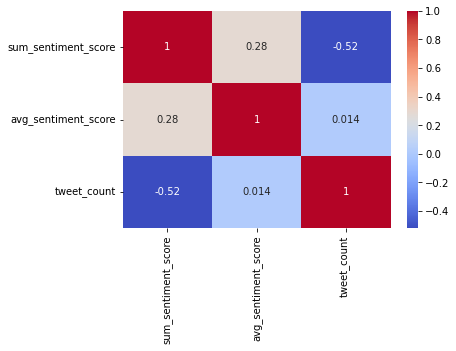

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

So using sum_sentiment_score and tweet_count as two features to build model would be a better choice.                   

In [27]:
print(daily_summary_comfirm.dtypes)


date                   datetime64[ns]
sum_sentiment_score           float64
avg_sentiment_score           float64
tweet_count                     int64
Total                          object
dtype: object


In [28]:
daily_summary_comfirm['Total'] = pd.to_numeric(daily_summary_comfirm['Total'], errors='coerce')

In [29]:
# Define a function to calculate IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
    return df.loc[filter]  

# Apply the function to each of the columns you're interested in
daily_summary_comfirm = remove_outliers(daily_summary_comfirm, 'Total')
daily_summary_comfirm = remove_outliers(daily_summary_comfirm, 'sum_sentiment_score')
daily_summary_comfirm = remove_outliers(daily_summary_comfirm, 'tweet_count')


In [30]:
daily_summary_comfirm = daily_summary_comfirm[daily_summary_comfirm['tweet_count'] != 0]

In [31]:
daily_summary_comfirm

,date,sum_sentiment_score,avg_sentiment_score,tweet_count,Total
17,2020-02-09,-3.423437,-0.085586,40,8.685611e-07
77,2020-04-09,-5.198317,-0.148523,35,5.672289e-02
107,2020-05-09,2.607551,0.096576,27,1.809901e-01
138,2020-06-09,0.822600,0.091400,9,2.828318e-01
168,2020-07-09,-1.763827,-0.073493,24,4.246364e-01
...,...,...,...,...,...
789,2022-03-22,-1.186107,-0.026358,45,1.251940e+01
790,2022-03-23,5.080523,0.099618,51,1.252573e+01
791,2022-03-24,3.570296,0.074381,48,1.253107e+01
794,2022-03-27,-0.826256,-0.063558,13,1.253761e+01


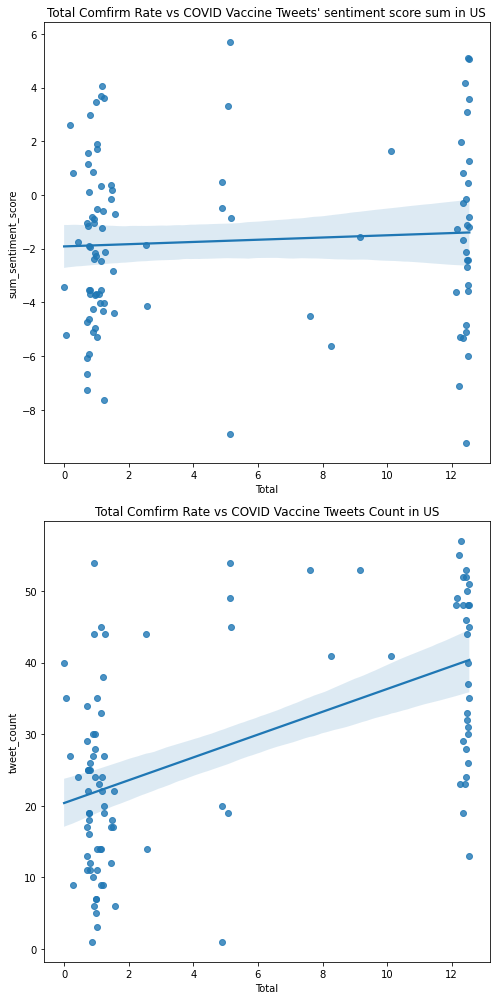

In [32]:
fig, axs = plt.subplots(2, figsize=(7, 14))

# Scatter plot with linear fit for Total and sum_sentiment_score
sns.regplot(x='Total', y='sum_sentiment_score', data=daily_summary_comfirm, ax=axs[0])
axs[0].set_title("Total Comfirm Rate vs COVID Vaccine Tweets' sentiment score sum in US")

# Scatter plot with linear fit for Total and tweet_count
sns.regplot(x='Total', y='tweet_count', data=daily_summary_comfirm, ax=axs[1])
axs[1].set_title('Total Comfirm Rate vs COVID Vaccine Tweets Count in US')

plt.tight_layout()
plt.show()


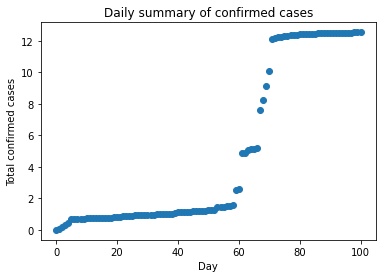

In [33]:
total = daily_summary_comfirm['Total']

# Create a scatter plot
plt.scatter(range(len(total)), total)

# Add axis labels and title
plt.xlabel('Day')
plt.ylabel('Total confirmed cases')
plt.title('Daily summary of confirmed cases')

# Show the plot
plt.show()